In [1]:
# import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('C:/Users/ASUS/Desktop/Kaggle/train.csv')
test = pd.read_csv('C:/Users/ASUS/Desktop/Kaggle/test.csv')
sample_submission = pd.read_csv('C:/Users/ASUS/Desktop/Kaggle/sample_submission.csv')

First, we do a data processing and clean.

In [3]:
# have a look at the discription of data.
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# the discription of the sale price.
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skew is: 1.8828757597682129


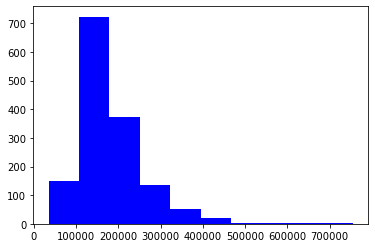

In [7]:
# also see the skewness of the sale price, so it is not normal distribution.
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

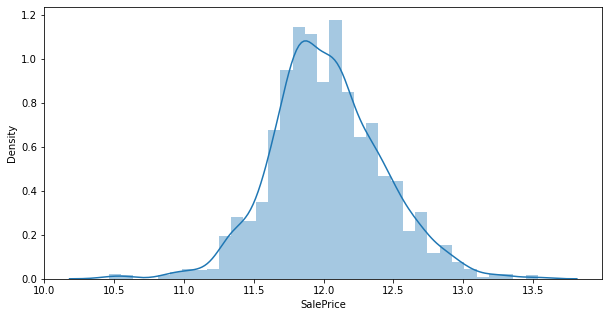

In [8]:
# transform it to normal distribution.
target = np.log(train.SalePrice)
plt.figure(figsize = (10,5))
sns.distplot(target)

In [9]:
# select type.
train_types = train.select_dtypes(include=['number'])
train_types.dtypes


Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
Name: SalePrice, dtype: float64


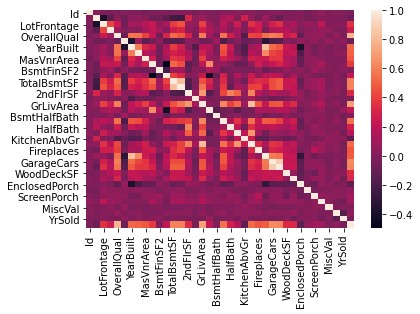

In [10]:
# use spearman correlation.
corr = train_types.corr()

print(corr['SalePrice'].sort_values(ascending=False)[0:10])
print(corr['SalePrice'].sort_values(ascending=False)[-11:-1])

sns.heatmap(corr)

mask = np.array(corr)

We select the abnormal data values, and drop them, do abnormal data analysis.

In [11]:
# know the null value.
null_values = train.isnull().sum().sort_values(ascending=False)[:35]
print(null_values)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
TotRmsAbvGrd       0
GarageCars         0
GrLivArea          0
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
dtype: int64


We now see the abnormal data in the database, and analytics those abnormal data.

In [12]:
# the disordered values.
abnomal_values = train.select_dtypes(exclude=[np.number])
abnomal_values.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [13]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [14]:
# intergrate overallqual and saleprice. 
Quanlity_pivot = train.pivot_table(index='OverallQual', values='SalePrice')
Quanlity_pivot

,SalePrice
OverallQual,
1,50150.000000
2,51770.333333
3,87473.750000
4,108420.655172
5,133523.347607
6,161603.034759
7,207716.423197
8,274735.535714
9,367513.023256


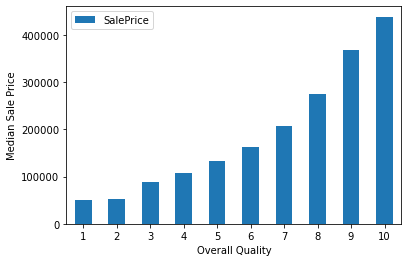

In [15]:
 # see the detailed quanlity of saleprice.
Quanlity_pivot.plot(kind='bar')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

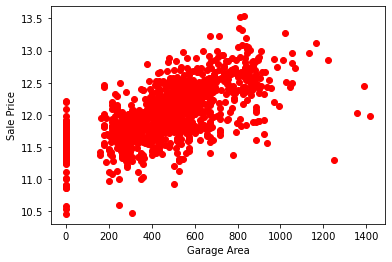

In [16]:
# see the certain "Garage Area" this abnomal data in detail.
plt.scatter(x=train['GarageArea'], y=target, color='red')
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

In [17]:
# calculate the null values for each columns, and rank them.
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False))[:25]
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


Then, we do feature engineering. we focus on the housestyle and streets.

In [18]:
# use pd.get_dummies() to do the feature engineering. we are in terested in the housestyle and the certain streets.
print ("Original: \n")
print (train.Street.value_counts(), "\n")

Original: 

Pave    1454
Grvl       6
Name: Street, dtype: int64 



In [19]:
train['enc_Street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_Street'] = pd.get_dummies(train.Street, drop_first=True)

In [20]:
# finished preparation of feature engineering. It run well.
print ('Encoded: \n')
print (train.enc_Street.value_counts())

Encoded: 

1    1454
0       6
Name: enc_Street, dtype: int64


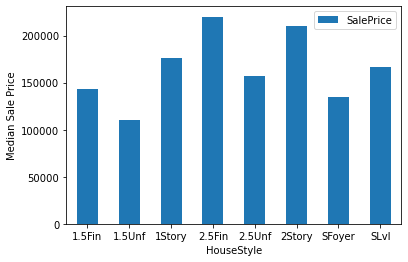

In [21]:
condition_pivot = train.pivot_table(index='HouseStyle', values='SalePrice')
condition_pivot.plot(kind='bar')
plt.xlabel('HouseStyle')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [22]:
# we then select 2.5Fin this element, because it is almost the highest of all.
def encode (x): return 1 if x == '2.5Fin' else 0

train['enc_HouseStyle']=train.HouseStyle.apply(encode)
test['enc_HouseStyle']=test.HouseStyle.apply(encode)


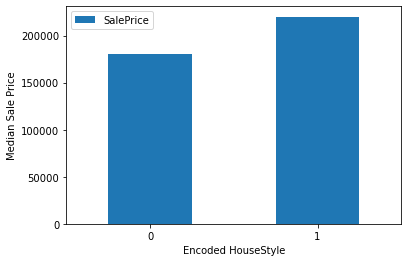

In [23]:
condition_pivot=train.pivot_table(index='enc_HouseStyle', values='SalePrice')
condition_pivot.plot(kind='bar')
plt.xlabel('Encoded HouseStyle')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

As we can see, 0 is not the 2.5Fin, and 1 is the 2.5Fin.

We can use cluster, to see some features of the data.

In [24]:
# import libraries.
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import pandas as pd

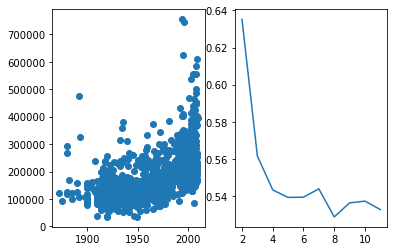

In [25]:
# see the cluster of year-bult and sale price.
x = train[["YearBuilt", "SalePrice"]]
score = []


for i in range(10):
    model = k_means(x, n_clusters=i + 2)
    score.append(silhouette_score(x, model[1]))

plt.subplot(1, 2, 1)
plt.scatter(train['YearBuilt'], train['SalePrice'])

plt.subplot(1, 2, 2)
plt.plot(range(2, 12, 1), score)
plt.show()

With the year goes by, the trend of the price goes up. 

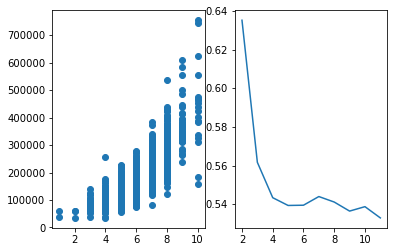

In [26]:
# see the cluster of house-quantity and sale prices.
x = train_types[["OverallQual", "SalePrice"]]

score = []

for i in range(10):
    model = k_means(x, n_clusters=i + 2)
    score.append(silhouette_score(x, model[1]))

plt.subplot(1, 2, 1)
plt.scatter(train_types['OverallQual'], train_types['SalePrice'])

plt.subplot(1, 2, 2)
plt.plot(range(2, 12, 1), score)
plt.show()

With the house quality goes up, the trend of the price goes up. 